In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Important libraries used
# Basic libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For statistical tests
import scipy.stats as stats

# For handling multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from lightgbm import LGBMClassifier

# For evaluation
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score,precision_score

# for preprocessing and splitting of the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/neo.csv')

In [ ]:
df=data.copy()

In [ ]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,torino_scale,Palermo Scale,hazard_rating
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,3,-14.782323,203
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,3,-18.453600,412
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,3,-19.408990,258
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,3,-16.088674,666
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,3,-17.273601,420


In [ ]:

# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
 10  torino_scale        90836 non-null  int64  
 11  Palermo Scale       90836 non-null  float64
 12  hazard_rating       90836 non-null  int64  
dtypes: bool(2), float64(6), int64(3), object(2)
memory usage: 7.8+ MB


In [ ]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01
torino_scale,90836.0,3.000044e+00,6.635808e-03,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
Palermo Scale,90836.0,-1.720263e+01,1.261939e+00,-2.099319e+01,-1.811361e+01,-1.734617e+01,-1.640282e+01,-5.660726e+00
hazard_rating,90836.0,1.079517e+03,6.886459e+02,4.300000e+01,5.520000e+02,9.240000e+02,1.432000e+03,7.436000e+03


In [ ]:
# Categorical summary statitics
df.describe(include=object).T

,count,unique,top,freq
name,90836,27423,469219 Kamo`oalewa (2016 HO3),43
orbiting_body,90836,1,Earth,90836


In [ ]:
# Checking for duplicate rows
df.duplicated().value_counts()
# Data has no duplicate rows

False    90836
dtype: int64

In [ ]:
# Checking for missing values
df.isnull().sum()
# Data has no missing values

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
torino_scale          0
Palermo Scale         0
hazard_rating         0
dtype: int64

In [ ]:
# Corelation Matrix
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous,torino_scale,Palermo Scale,hazard_rating
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,NaN,0.277258,-0.123443,-0.003937,0.052371,0.252024
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363,0.591972,-0.182893,-0.377930
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363,0.591972,-0.182893,-0.377930
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,NaN,-0.353863,0.191185,-0.005360,-0.930630,-0.285089
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,NaN,-0.264168,0.042302,0.001342,-0.292809,-0.221461
sentry_object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,NaN,1.000000,-0.365267,-0.030926,0.314510,0.926463
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,NaN,-0.365267,1.000000,-0.002179,-0.181377,-0.296272
torino_scale,-0.003937,0.591972,0.591972,-0.005360,0.001342,NaN,-0.030926,-0.002179,1.000000,0.005821,-0.009916
Palermo Scale,0.052371,-0.182893,-0.182893,-0.930630,-0.292809,NaN,0.314510,-0.181377,0.005821,1.000000,0.265182


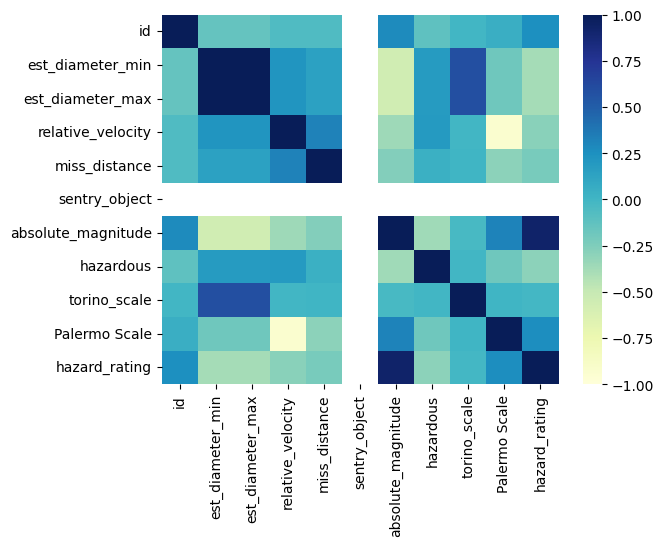

In [ ]:
# Vizualization of the correlation matrix
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='YlGnBu')
plt.show()

In [ ]:
# Dropping some redundant column:
# We will drop the orbiting_body and sentry_object columns because these 2 only have one kind of values namely,Earth and False.
# We would also be dropping the id column as well
df.drop(columns=['orbiting_body','sentry_object','name','id'],inplace=True)

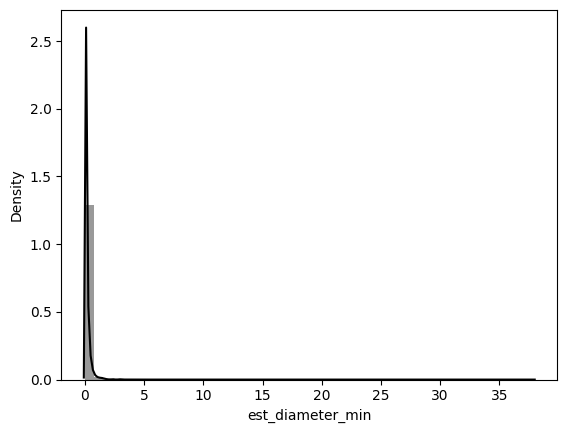

In [ ]:
## Column: est_diameter_min
sns.distplot(df.est_diameter_min,color='black')
plt.show()

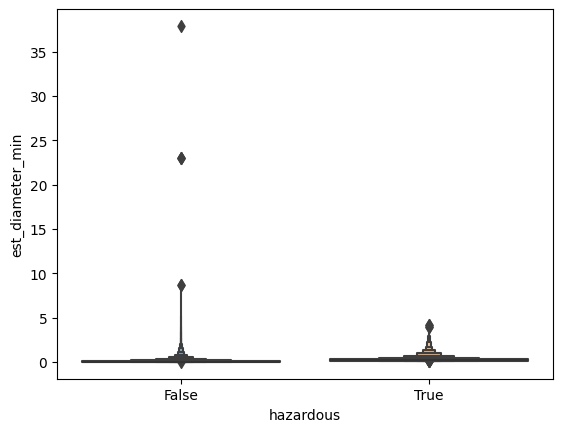

In [ ]:
sns.boxenplot(x='hazardous',y='est_diameter_min',data=df)
plt.show()

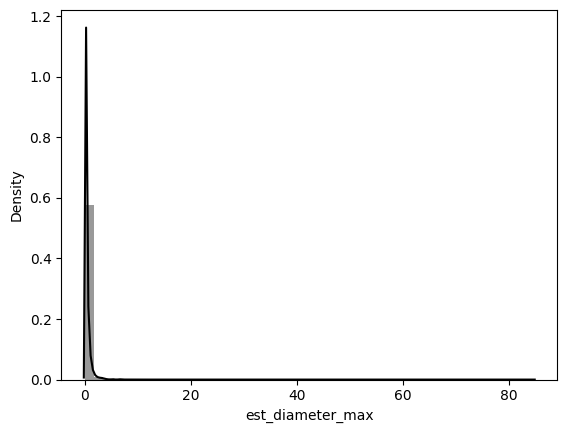

In [ ]:
sns.distplot(df.est_diameter_max,color='black')
plt.show()

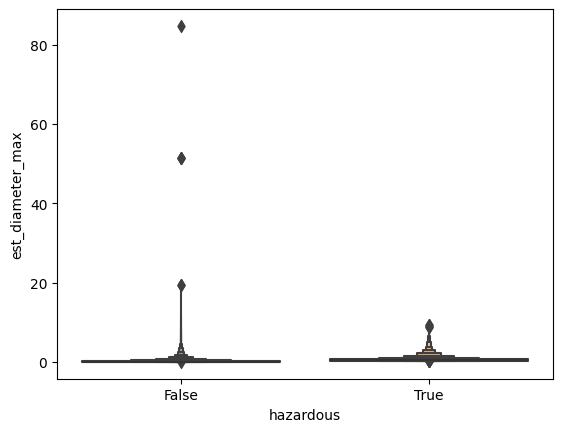

In [ ]:
sns.boxenplot(x='hazardous',y='est_diameter_max',data=df)
plt.show()

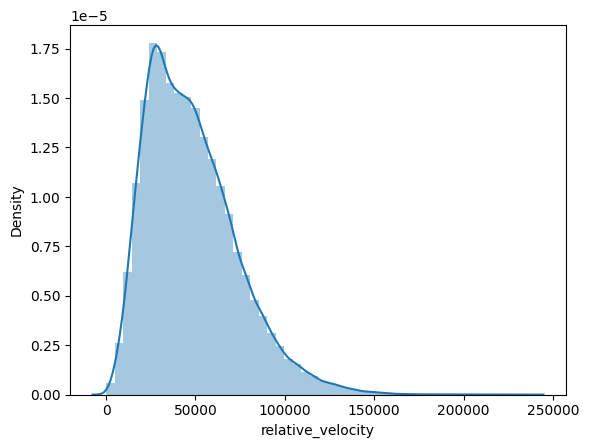

In [ ]:
sns.distplot(df.relative_velocity)
plt.show()

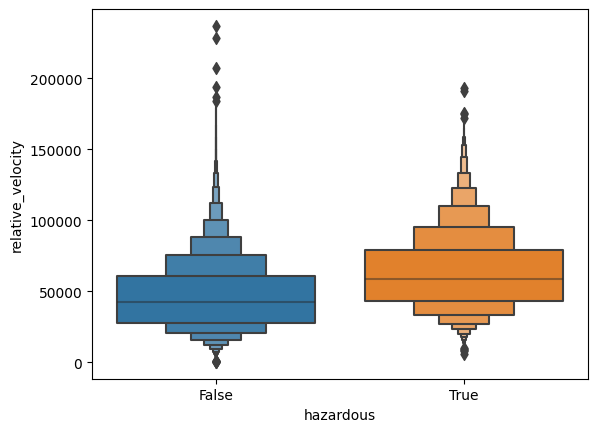

In [ ]:
sns.boxenplot(x='hazardous',y='relative_velocity',data=df)
plt.show()

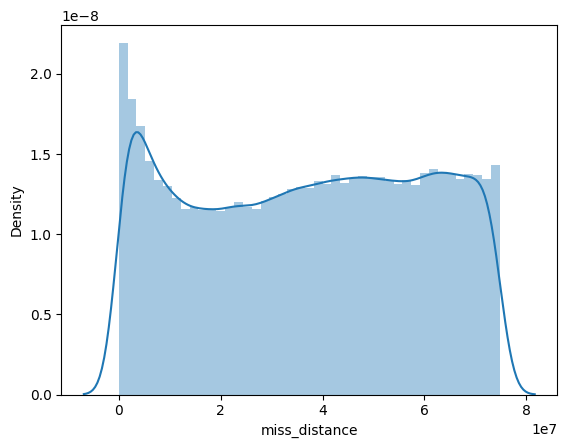

In [ ]:
sns.distplot(df.miss_distance)
plt.show()

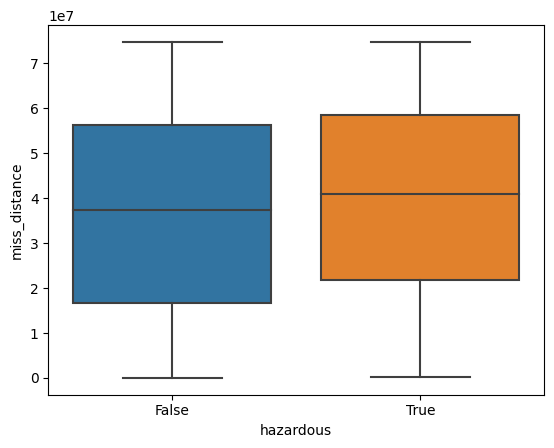

In [ ]:
sns.boxplot(x='hazardous',y='miss_distance',data=df)
plt.show()

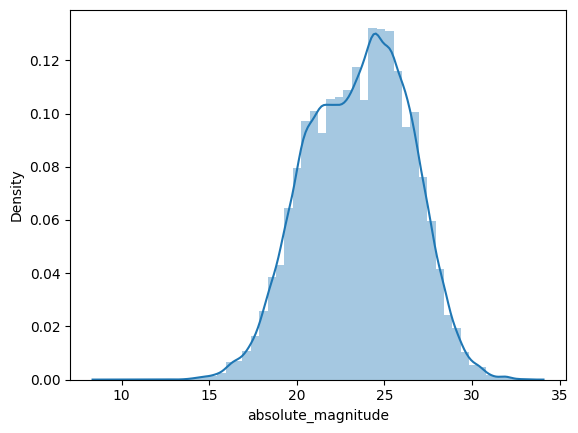

In [ ]:
sns.distplot(df.absolute_magnitude)
plt.show()

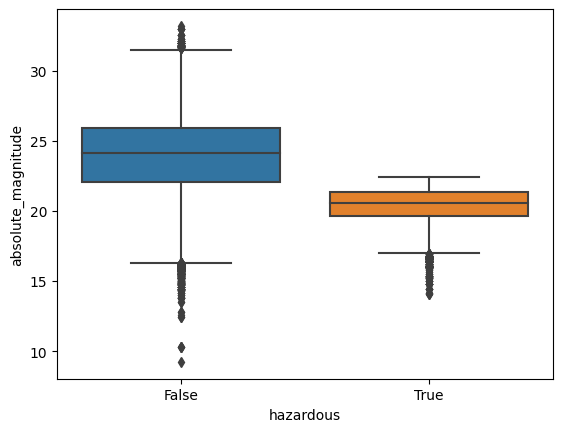

In [ ]:
sns.boxplot(x='hazardous',y='absolute_magnitude',data=df)
plt.show()

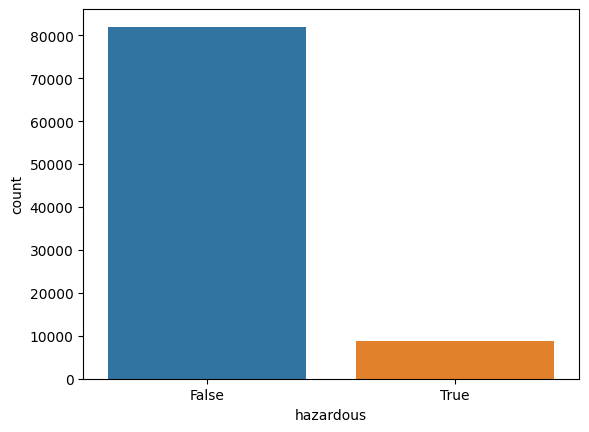

In [ ]:
sns.countplot(x='hazardous',data=df)
plt.show()

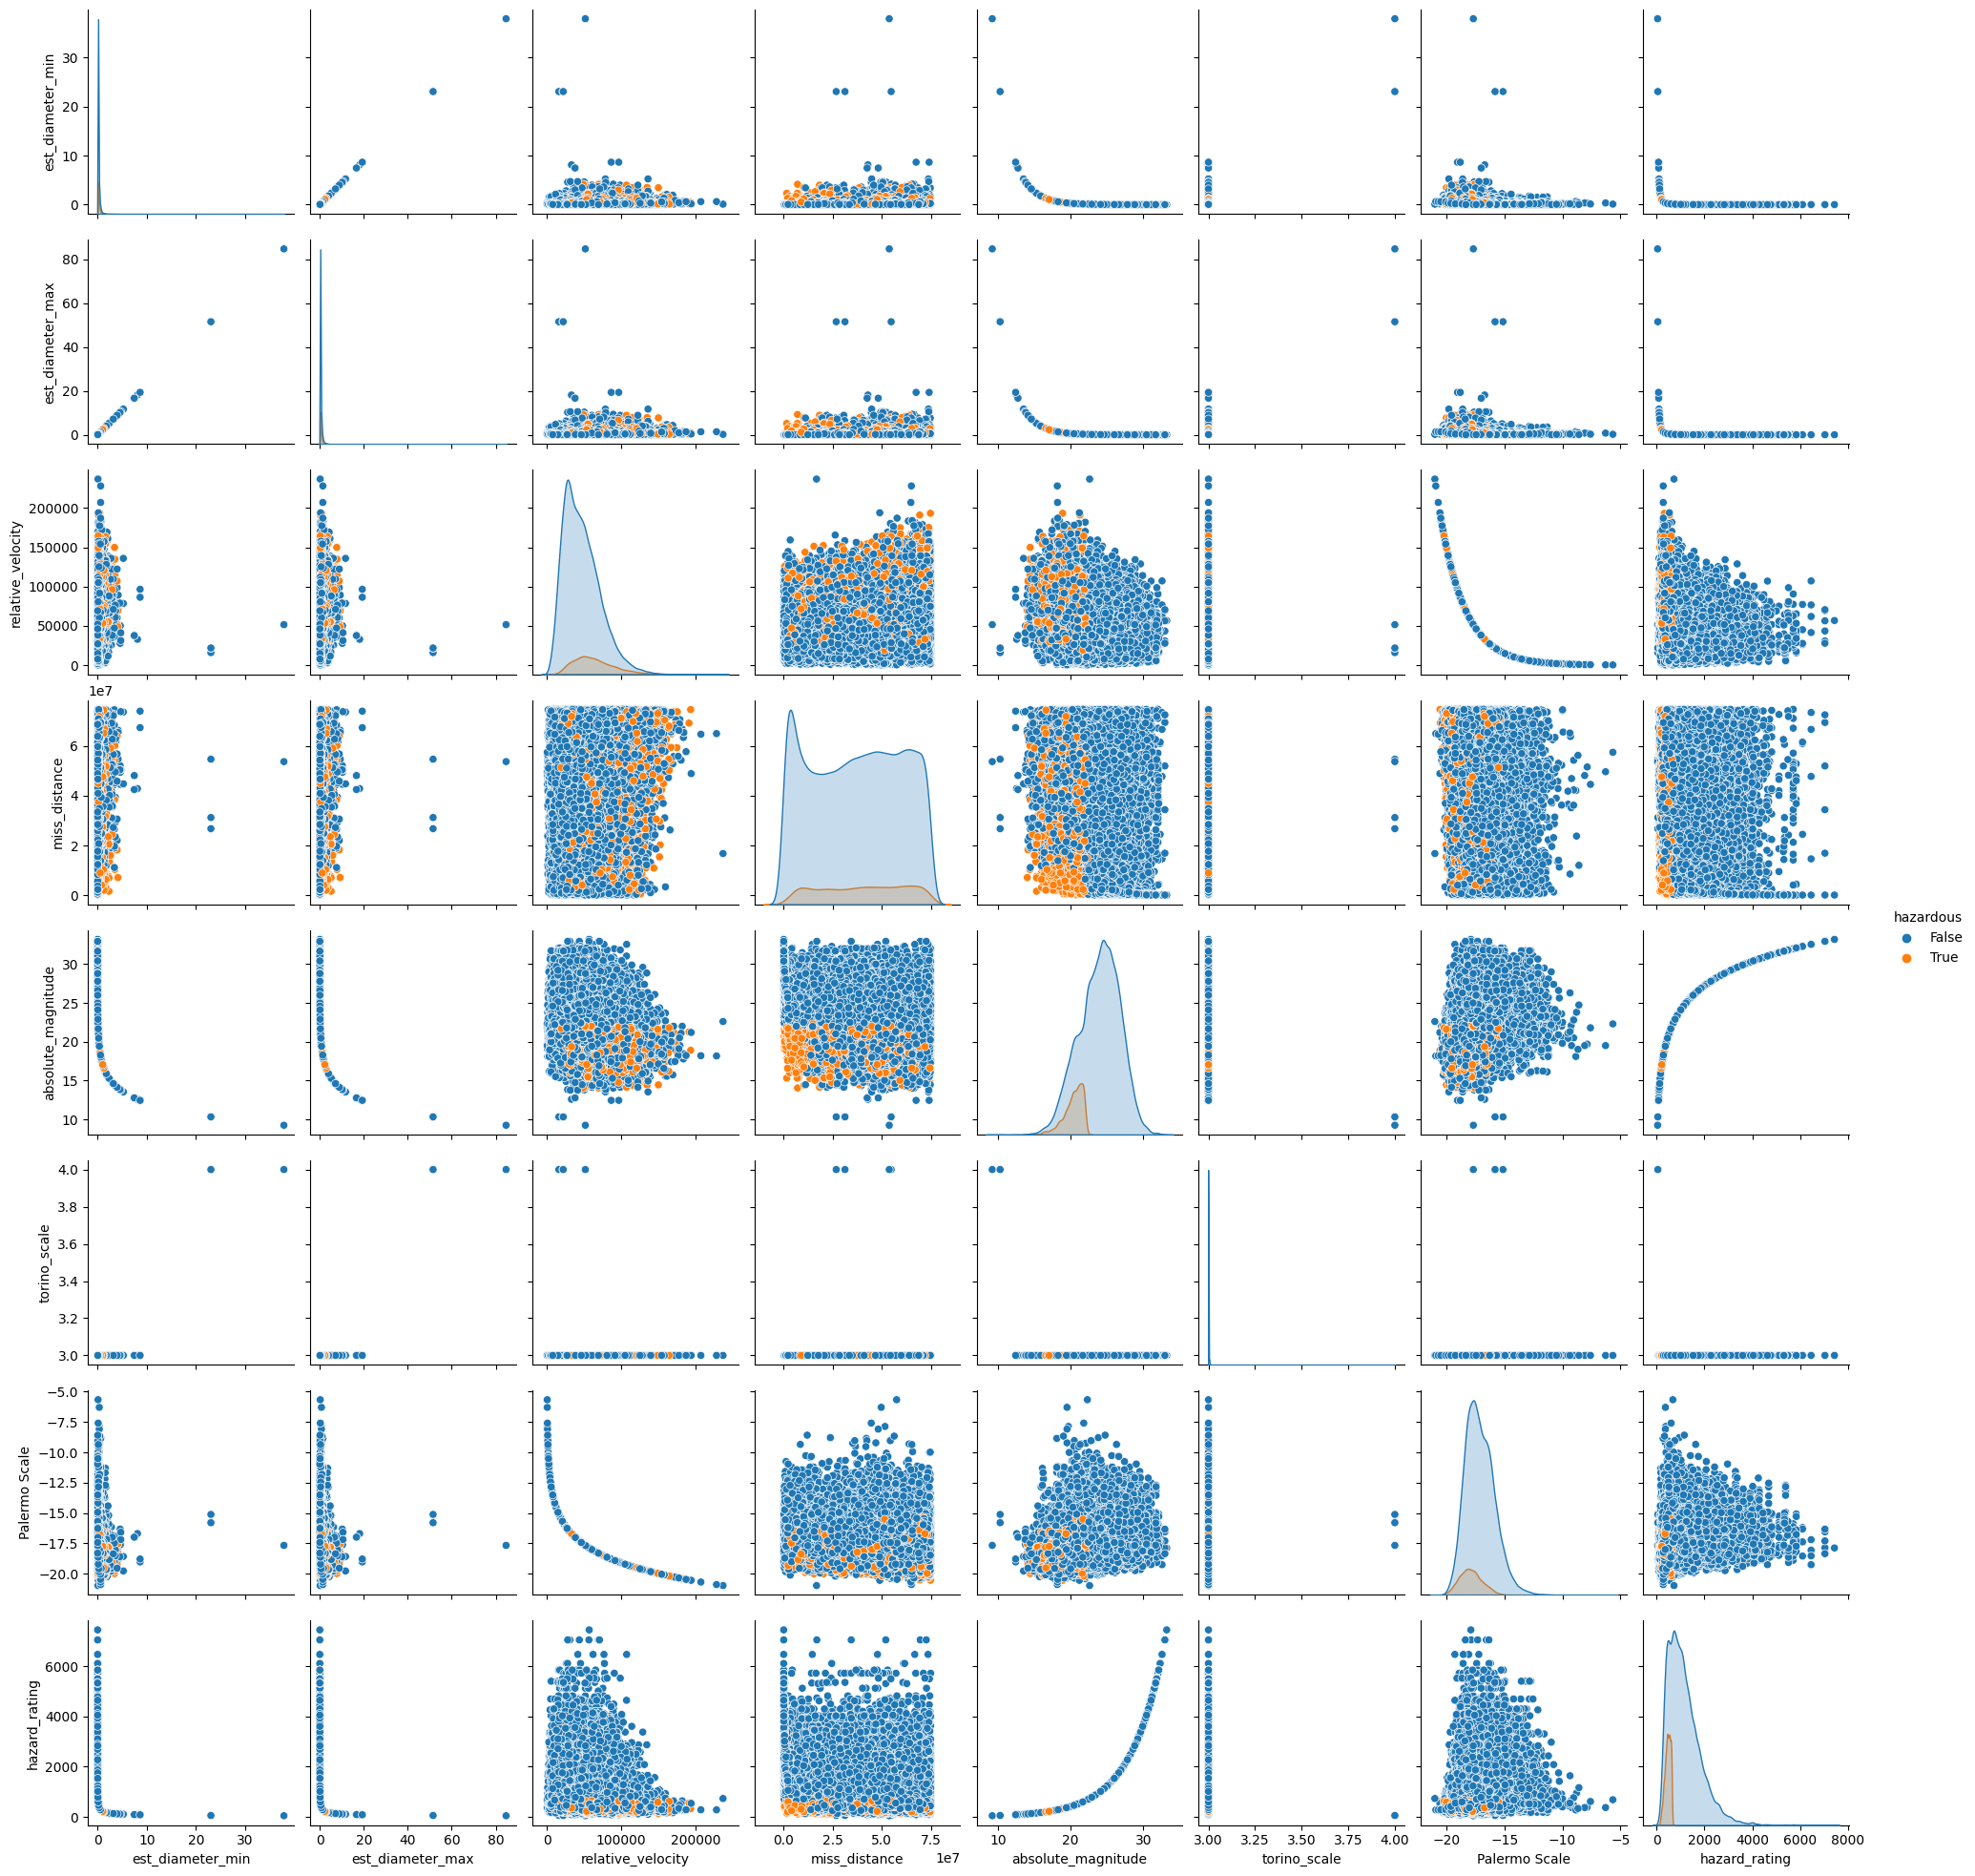

In [ ]:
sns.pairplot(df, hue = "hazardous")

In [ ]:
# Taking the average of est_diameter_min and est_diameter_max to make a new feature est_diameter_avg
df['est_diameter_avg']=(df.est_diameter_max+df.est_diameter_min)/2

In [ ]:
import math

def palermo_scale(absolute_magnitude, 	est_diameter_max, 	miss_distance, relative_velocity):
    """
    Calculates the Palermo Scale value for an asteroid based on its absolute magnitude, diameter, distance from Earth, and
    relative velocity.

    Parameters:
        h (float): Absolute magnitude of the asteroid.
        diameter (float): Diameter of the asteroid in kilometers.
        dist (float): Distance of the asteroid from Earth in astronomical units (AU).
        v_rel (float): Relative velocity between the asteroid and Earth in kilometers per second.

    Returns:
        float: The Palermo Scale value for the asteroid.
    """
    e = 0.03 * math.sqrt(	est_diameter_max)
    m = absolute_magnitude + 5 * math.log10(miss_distance) - 2.5 * math.log10(1 - e)
    ps = -2.5 * math.log10(10 ** (-0.2 * m) + 10 ** (-0.2 * (m - 2.5)) + (relative_velocity / 15) ** 2)
    return ps

# Load the asteroid dataset
asteroids = pd.read_csv('/content/drive/MyDrive/neo.csv')

# Calculate Palermo Scale for each asteroid in the dataset
ps_values = []
for index, row in asteroids.iterrows():
    ps = palermo_scale(row['absolute_magnitude'], row['est_diameter_max'], row['miss_distance'], row['relative_velocity'])
    ps_values.append(ps)

# Add the Palermo Scale values as a new column in the dataset
asteroids['Palermo Scale'] = ps_values

# Save the updated dataset to a new CSV file
asteroids.to_csv('/content/drive/MyDrive/neo.csv', index=False)

In [ ]:
print(df.head())

   est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0          1.198271          2.679415       13569.249224   5.483974e+07   
1          0.265800          0.594347       73588.726663   6.143813e+07   
2          0.722030          1.614507      114258.692129   4.979872e+07   
3          0.096506          0.215794       24764.303138   2.543497e+07   
4          0.255009          0.570217       42737.733765   4.627557e+07   

   absolute_magnitude  hazardous  torino_scale  Palermo Scale  hazard_rating  \
0               16.73      False             3     -14.782323            203   
1               20.00       True             3     -18.453600            412   
2               17.83      False             3     -19.408990            258   
3               22.20      False             3     -16.088674            666   
4               20.09       True             3     -17.273601            420   

   est_diameter_avg  
0          1.938843  
1          0.430073  
2 

In [ ]:
# Since in our dataframe all our features are numerical
# We would use 2 sample ttest to check the effect of these column on the target variable

stat_df=pd.DataFrame() # Empty dataframe that would contain the features and the pvalue for the statistical test
stat_df['Features']=df.drop(columns='hazardous').columns # Creating column for all the features
lst=[] # Empty list to contain all the pvalues of the tests

for i in df.drop(columns='hazardous').columns:
    # Null Hypothesis: 'i' has no impact on the target variable
    # Alternate Hypothesis: 'i' has an impact on the target variable
    haz_sample=df.loc[df.hazardous==True,i]
    nonhaz_sample=df.loc[df.hazardous==False,i]
    lst.append(stats.ttest_ind(haz_sample,nonhaz_sample)[1])
stat_df['Pvalue']=lst

stat_df

,Features,Pvalue
0,est_diameter_min,0.000000e+00
1,est_diameter_max,0.000000e+00
2,relative_velocity,0.000000e+00
3,miss_distance,2.927203e-37
4,absolute_magnitude,0.000000e+00
5,torino_scale,5.113769e-01
6,Palermo Scale,0.000000e+00
7,hazard_rating,0.000000e+00
8,est_diameter_avg,0.000000e+00


In [ ]:
# Mapping the target variable to 1 and 0
df.hazardous=df.hazardous.map({True:1,False:0})

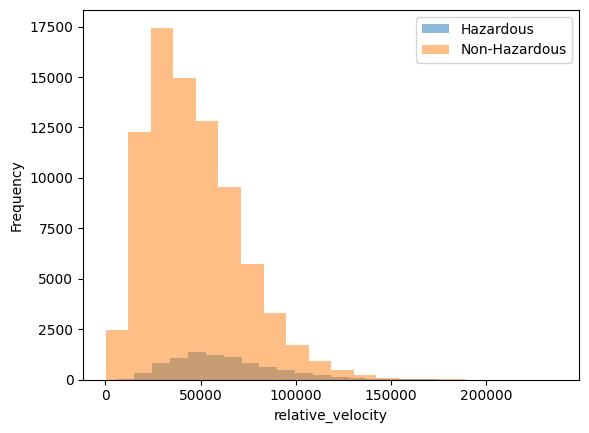

In [ ]:
import matplotlib.pyplot as plt

hazardous_diameters = df[df['hazardous'] == 1]['relative_velocity']
non_hazardous_diameters = df[df['hazardous'] == 0]['relative_velocity']

fig, ax = plt.subplots()
ax.hist(hazardous_diameters, bins=20, alpha=0.5, label='Hazardous')
ax.hist(non_hazardous_diameters, bins=20, alpha=0.5, label='Non-Hazardous')
ax.legend(loc='upper right')
ax.set_xlabel('relative_velocity')
ax.set_ylabel('Frequency')
plt.show()


In [ ]:
# Splitting the data into x and y
x=df.drop(columns='hazardous')
y=df.hazardous

In [ ]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)

In [ ]:
# Shape of the train and test sets
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((72668, 9), (72668,), (18168, 9), (18168,))

In [ ]:
# Before proceeding to our modelling we will create a function to check th evaluation scores

def evaluation(y_test,y_pred):

    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()

# Our evaluation fucntion is now created

In [ ]:
# Since Logistic Regression is a distance based algorithm we would need to scale our train and test sets
# before procedding to our model fitting
# For this we would use Standard scaler

sc=StandardScaler()

x_train_s=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_s=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

# Our train and test sets are now scaled

In [ ]:
# We will now proceed to our modelling
lr=LogisticRegression() # Machine instance

In [ ]:
lr_model=lr.fit(x_train_s,y_train)
y_pred=lr_model.predict(x_test_s)

Accuracy Score: 0.9056032584764421
f1_score: 0.1227621483375959
Precision: 0.6417112299465241
Recall: 0.06787330316742081
Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     16400
           1       0.64      0.07      0.12      1768

    accuracy                           0.91     18168
   macro avg       0.78      0.53      0.54     18168
weighted avg       0.88      0.91      0.87     18168



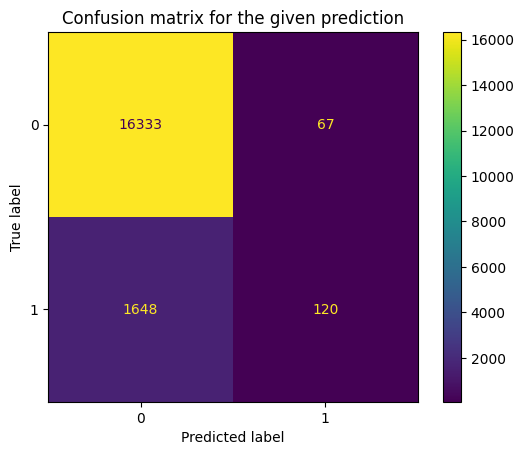

In [ ]:
# We will see a few metrics and check how our model is performing
evaluation(y_test,y_pred)

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
# Since Decision trees are tree base models we don't need to fit the model on a scaled data so we would pass the initial spilit
# train and test sets
dt_model=dtree.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

Accuracy Score: 0.8932188463232056
f1_score: 0.45166760881854157
Precision: 0.4514124293785311
Recall: 0.4519230769230769
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     16400
           1       0.45      0.45      0.45      1768

    accuracy                           0.89     18168
   macro avg       0.70      0.70      0.70     18168
weighted avg       0.89      0.89      0.89     18168



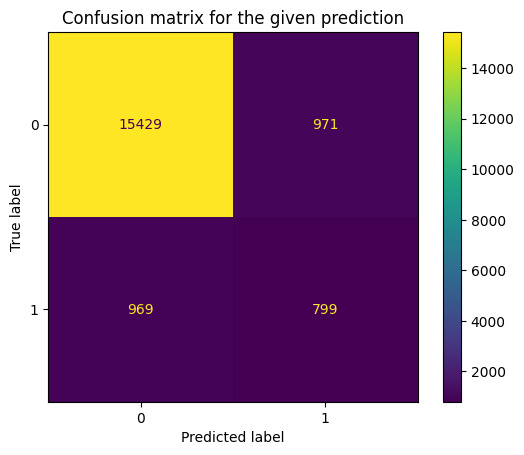

In [ ]:
# Evalutaion of the model
evaluation(y_test,y_pred)

In [ ]:
# Get the feature importance scores
importances = dtree.feature_importances_

# Create a dictionary with feature names and their importance scores
feature_importances = dict(zip(x.columns, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top N features with the highest scores
n = 10
for feature, importance in sorted_features[:n]:
    print(f"{feature}: {importance:.4f}")

miss_distance: 0.2998
hazard_rating: 0.2563
relative_velocity: 0.1521
Palermo Scale: 0.1443
est_diameter_avg: 0.0435
absolute_magnitude: 0.0352
est_diameter_max: 0.0348
est_diameter_min: 0.0340
torino_scale: 0.0000


In [ ]:
rf=RandomForestClassifier()

In [ ]:
# Fitting and predicting
y_pred=rf.fit(x_train,y_train).predict(x_test)

Accuracy Score: 0.9172721268163805
f1_score: 0.49102607517778535
Precision: 0.6118143459915611
Recall: 0.4100678733031674
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     16400
           1       0.61      0.41      0.49      1768

    accuracy                           0.92     18168
   macro avg       0.78      0.69      0.72     18168
weighted avg       0.91      0.92      0.91     18168



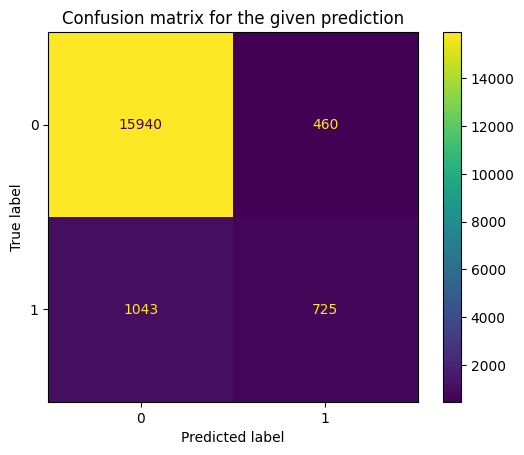

In [ ]:
# evaluation of the model
evaluation(y_test,y_pred)

In [ ]:
# Get the feature importance scores
importances = rf.feature_importances_

# Create a dictionary with feature names and their importance scores
feature_importances = dict(zip(x.columns, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top N features with the highest scores
n = 10
for feature, importance in sorted_features[:n]:
    print(f"{feature}: {importance:.4f}")

miss_distance: 0.2326
Palermo Scale: 0.1670
relative_velocity: 0.1653
est_diameter_max: 0.0943
hazard_rating: 0.0891
absolute_magnitude: 0.0879
est_diameter_min: 0.0825
est_diameter_avg: 0.0813
torino_scale: 0.0000


In [ ]:
# We will now try some boosting techinques starting with gradient boosting
gb=GradientBoostingClassifier()

In [ ]:
# Fitting the model
gb_model=gb.fit(x_train,y_train)

In [ ]:
# making predictions
y_pred=gb_model.predict(x_test)

Accuracy Score: 0.9128137384412153
f1_score: 0.23552123552123552
Precision: 0.8026315789473685
Recall: 0.13800904977375567
Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     16400
           1       0.80      0.14      0.24      1768

    accuracy                           0.91     18168
   macro avg       0.86      0.57      0.59     18168
weighted avg       0.90      0.91      0.88     18168



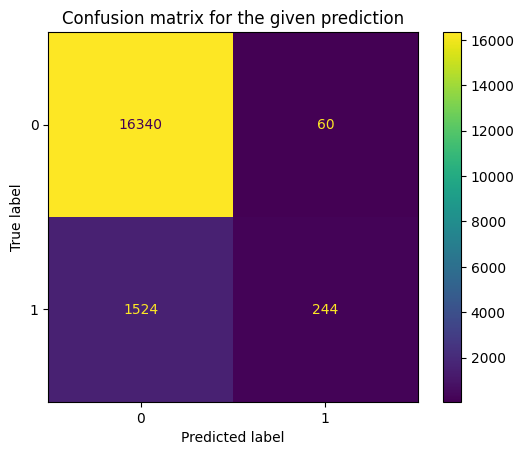

In [ ]:
# evaluation of the model
evaluation(y_test,y_pred)

In [ ]:
# Get the feature importance scores
importances = gb.feature_importances_

# Create a dictionary with feature names and their importance scores
feature_importances = dict(zip(x.columns, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top N features with the highest scores
n = 10
for feature, importance in sorted_features[:n]:
    print(f"{feature}: {importance:.4f}")

absolute_magnitude: 0.3492
miss_distance: 0.1889
est_diameter_avg: 0.1770
hazard_rating: 0.1411
est_diameter_min: 0.0565
est_diameter_max: 0.0433
Palermo Scale: 0.0223
relative_velocity: 0.0217
torino_scale: 0.0000


In [ ]:
# We will see whether xgboost performs any better
xgb=XGBClassifier()

In [ ]:
# Fitting and prediction
y_pred=xgb.fit(x_train,y_train).predict(x_test)

Accuracy Score: 0.918483047115808
f1_score: 0.3679043960734102
Precision: 0.7495652173913043
Recall: 0.24377828054298642
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     16400
           1       0.75      0.24      0.37      1768

    accuracy                           0.92     18168
   macro avg       0.84      0.62      0.66     18168
weighted avg       0.91      0.92      0.90     18168



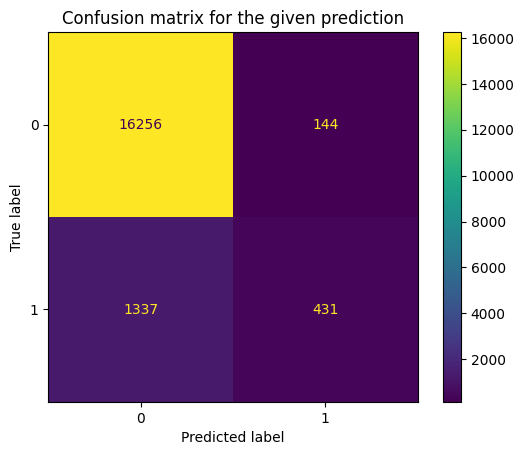

In [ ]:
# Evaluation
evaluation(y_test,y_pred)

In [ ]:
# Get the feature importance scores
importances = xgb.feature_importances_

# Create a dictionary with feature names and their importance scores
feature_importances = dict(zip(x.columns, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top N features with the highest scores
n = 10
for feature, importance in sorted_features[:n]:
    print(f"{feature}: {importance:.4f}")

est_diameter_min: 0.7625
miss_distance: 0.1467
relative_velocity: 0.0909
est_diameter_max: 0.0000
absolute_magnitude: 0.0000
torino_scale: 0.0000
Palermo Scale: 0.0000
hazard_rating: 0.0000
est_diameter_avg: 0.0000


In [ ]:
# Checking for Multicolinearity
vif=pd.DataFrame()

# creating the features column
vif['Features']=df.drop(columns='hazardous').columns

# creating the vif column
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.drop(columns='hazardous').shape[1])]

vif

,Features,VIF
0,est_diameter_min,inf
1,est_diameter_max,inf
2,relative_velocity,36.782783
3,miss_distance,4.371058
4,absolute_magnitude,880.776440
5,torino_scale,1.326286
6,Palermo Scale,1654.623490
7,hazard_rating,1413.107929
8,est_diameter_avg,32.998580


In [ ]:
df.drop(columns=['est_diameter_min','est_diameter_max'],inplace=True)

In [ ]:
# Splitting the data again
x=df.drop(columns='hazardous')
y=df.hazardous
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((72668, 7), (18168, 7), (72668,), (18168,))

In [ ]:
# Let us move ahead with our Random Forrest Model since it was working best overall
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

Accuracy Score: 0.9194738000880669
f1_score: 0.4998290598290598
Precision: 0.6318063958513397
Recall: 0.41346153846153844
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     16400
           1       0.63      0.41      0.50      1768

    accuracy                           0.92     18168
   macro avg       0.79      0.69      0.73     18168
weighted avg       0.91      0.92      0.91     18168



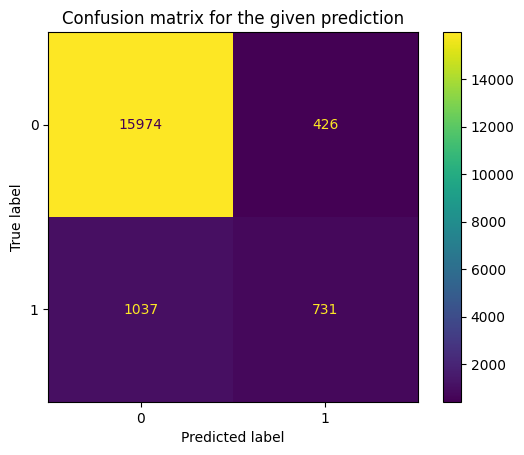

In [ ]:
# Evaluation of the random forrest model
evaluation(y_test,y_pred)

In [ ]:
# Get the feature importance scores
importances = rf.feature_importances_

# Create a dictionary with feature names and their importance scores
feature_importances = dict(zip(x.columns, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top N features with the highest scores
n = 10
for feature, importance in sorted_features[:n]:
    print(f"{feature}: {importance:.4f}")

miss_distance: 0.2299
Palermo Scale: 0.1700
relative_velocity: 0.1691
absolute_magnitude: 0.1491
hazard_rating: 0.1427
est_diameter_avg: 0.1392
torino_scale: 0.0000


In [ ]:
# Initilizing Random forrest model again
rf=RandomForestClassifier(class_weight={0:2.5,1:1})
rf_model=rf.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

Accuracy Score: 0.9187582562747688
f1_score: 0.4996610169491526
Precision: 0.6235194585448393
Recall: 0.4168552036199095
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     16400
           1       0.62      0.42      0.50      1768

    accuracy                           0.92     18168
   macro avg       0.78      0.69      0.73     18168
weighted avg       0.91      0.92      0.91     18168



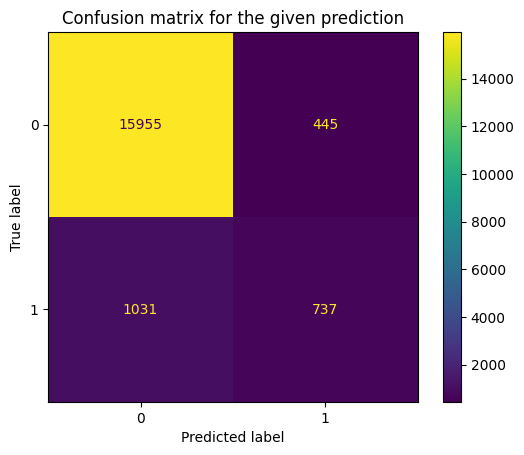

In [ ]:
# Evaluation of the model
evaluation(y_test,y_pred)

In [ ]:
# Get the feature importance scores
importances = rf.feature_importances_

# Create a dictionary with feature names and their importance scores
feature_importances = dict(zip(x.columns, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top N features with the highest scores
n = 10
for feature, importance in sorted_features[:n]:
    print(f"{feature}: {importance:.4f}")

miss_distance: 0.2709
relative_velocity: 0.1967
Palermo Scale: 0.1935
est_diameter_avg: 0.1156
hazard_rating: 0.1122
absolute_magnitude: 0.1110
torino_scale: 0.0000


In [ ]:
lgbm=LGBMClassifier(scale_pos_weight=3.5)
lg_model=lgbm.fit(x_train,y_train)
y_pred=lg_model.predict(x_test)

Accuracy Score: 0.8430206957287538
f1_score: 0.5154604145429834
Precision: 0.368382710053424
Recall: 0.8580316742081447
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91     16400
           1       0.37      0.86      0.52      1768

    accuracy                           0.84     18168
   macro avg       0.68      0.85      0.71     18168
weighted avg       0.92      0.84      0.87     18168



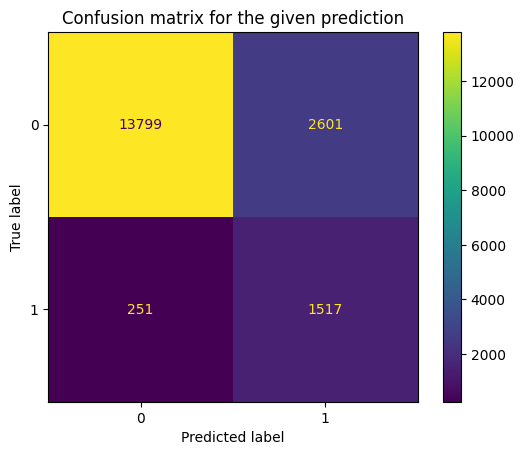

In [ ]:
# Evaluation of the model
evaluation(y_test,y_pred)

In [ ]:
# Get the feature importance scores
importances = lgbm.feature_importances_

# Create a dictionary with feature names and their importance scores
feature_importances = dict(zip(x.columns, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top N features with the highest scores
n = 10
for feature, importance in sorted_features[:n]:
    print(f"{feature}: {importance:.4f}")

miss_distance: 824.0000
absolute_magnitude: 731.0000
relative_velocity: 658.0000
est_diameter_avg: 418.0000
Palermo Scale: 299.0000
hazard_rating: 70.0000
torino_scale: 0.0000


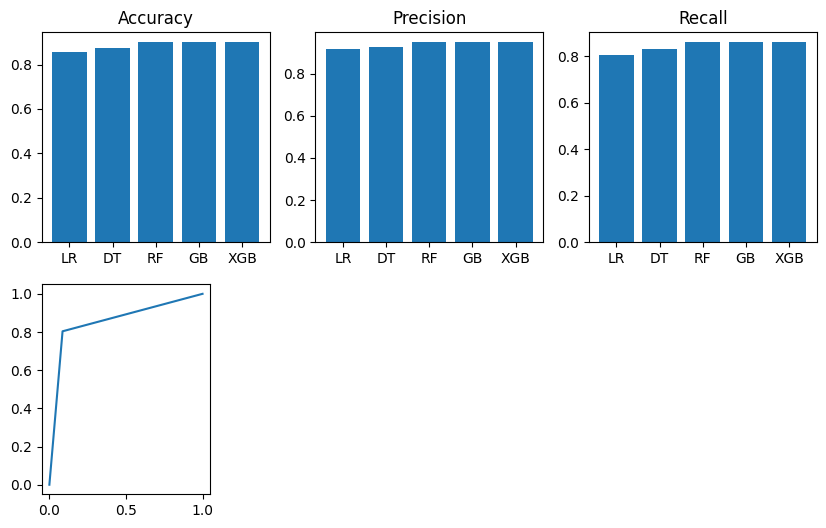

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Generate example classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = RandomForestClassifier(random_state=42)
xgb = RandomForestClassifier(random_state=42)

# Train the classifiers on the training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions on the testing data
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Calculate evaluation metrics
lr_acc = accuracy_score(y_test, lr_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
gb_acc = accuracy_score(y_test, gb_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)

lr_prec = precision_score(y_test, lr_pred)
dt_prec = precision_score(y_test, dt_pred)
rf_prec = precision_score(y_test, rf_pred)
gb_prec = precision_score(y_test, gb_pred)
xgb_prec = precision_score(y_test, xgb_pred)

lr_rec = recall_score(y_test, lr_pred)
dt_rec = recall_score(y_test, dt_pred)
rf_rec = recall_score(y_test, rf_pred)
gb_rec = recall_score(y_test, gb_pred)
xgb_rec = recall_score(y_test, xgb_pred)

lr_f1 = f1_score(y_test, lr_pred)
dt_f1 = f1_score(y_test, dt_pred)
rf_f1 = f1_score(y_test, rf_pred)
gb_f1 = f1_score(y_test, gb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_pred)
lr_roc_auc = auc(lr_fpr, lr_tpr)

dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_pred)
dt_roc_auc = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)

gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_pred)
gb_roc_auc = auc(gb_fpr, gb_tpr)

xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_pred)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot the evaluation metrics
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.bar(['LR', 'DT', 'RF','GB','XGB'], [lr_acc, dt_acc, rf_acc, gb_acc, xgb_acc])
plt.title('Accuracy')

plt.subplot(2, 3, 2)
plt.bar(['LR', 'DT', 'RF','GB','XGB'], [lr_prec, dt_prec, rf_prec,gb_prec, xgb_prec])
plt.title('Precision')

plt.subplot(2, 3, 3)
plt.bar(['LR', 'DT', 'RF','GB','XGB'], [lr_rec, dt_rec, rf_rec,gb_rec, xgb_rec])
plt.title('Recall')

plt.subplot(2, 3, 4)
plt.bar(['LR', 'DT', 'RF','GB','XGB'], [lr_f1, dt_f1, rf_f1,gb_f1, xgb_f1])
plt.title('F1 Score')

plt.subplot(2, 4, 5)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_roc_auc))


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset with missing values
df = pd.read_csv('/content/drive/MyDrive/neo.csv')

# Split the dataset into input features and target variable
X = df.drop('hazardous', axis=1)
y = df['hazardous']

# Convert non-numeric columns to numeric
X['name'] = pd.to_numeric(X['name'], errors='coerce')
X['orbiting_body'] = pd.to_numeric(X['orbiting_body'], errors='coerce')


# Create a SimpleImputer object to replace missing values with mean or median
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the input features
imputer.fit(X)

# Transform the input features by replacing missing values with mean or median
X_imputed = imputer.transform(X)

# Train a machine learning model on the imputed dataset
model = RandomForestClassifier()
model.fit(X_imputed, y)

RandomForestClassifier()

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, '/content/drive/MyDrive/neo.pkl')

['/content/drive/MyDrive/neo.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import joblib

# Load the saved model
model = joblib.load('/content/drive/MyDrive/neo.pkl')

# Prepare new data as a DataFrame
new_data = pd.DataFrame({
    'est_diameter_min': [0.2658],  # replace with your asteroid's estimated diameter
    'est_diameter_max': [0.594347],
    'relative_velocity': [115892.5],  # replace with your asteroid's relative velocity
    'miss_distance': [0],  # replace with your asteroid's miss distance
    'orbiting_body': ['Earth'],
    'sentry_object': [False],  # replace with whether your asteroid is a Sentry Object or not
    'absolute_magnitude': [0],  # replace with your asteroid's absolute magnitude
    'torino_scale': [3],  # replace with your asteroid's Torino Scale value
    'Palermo Scale': [0],  # replace with your asteroid's Palermo Scale value
    'hazard_rating': [0]
})

# Encode the categorical feature 'orbiting_body'
cat_features = ['orbiting_body']
cat_encoder = OneHotEncoder()
new_data_cat = pd.DataFrame(cat_encoder.fit_transform(new_data[cat_features]).toarray())
new_data_cat.columns = cat_encoder.get_feature_names_out(cat_features)
new_data_encoded = pd.concat([new_data, new_data_cat], axis=1)
new_data_encoded = new_data_encoded.drop(columns=cat_features)

def predict_with_threshold(data, feature_name):
    # Extract the feature to set a threshold for
    feature = data[feature_name].values

    # Determine the threshold based on the 95th percentile of the feature data
    threshold = np.percentile(feature, 95)

    # Make predictions on the new data
    y_pred_proba = model.predict_proba(new_data_encoded)
    y_pred = (y_pred_proba[:, 1] > threshold).astype(int)

    # Print the predicted values
    print(y_pred)

# Set threshold based on the distribution of feature data
predict_with_threshold(new_data_encoded, 'est_diameter_min')
predict_with_threshold(new_data_encoded, 'est_diameter_max')
predict_with_threshold(new_data_encoded, 'relative_velocity')
predict_with_threshold(new_data_encoded, 'miss_distance')
predict_with_threshold(new_data_encoded, 'absolute_magnitude')
predict_with_threshold(new_data_encoded, 'torino_scale')


[1]
[1]
[0]
[1]
[1]
[0]


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset with missing values
df = pd.read_csv('/content/drive/MyDrive/neo.csv')

# Split the dataset into input features and target variable
X = df.drop('hazardous', axis=1)
y = df['hazardous']

# Convert non-numeric columns to numeric
X['name'] = pd.to_numeric(X['name'], errors='coerce')
X['orbiting_body'] = pd.to_numeric(X['orbiting_body'], errors='coerce')


# Create a SimpleImputer object to replace missing values with mean or median
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the input features
imputer.fit(X)

# Transform the input features by replacing missing values with mean or median
X_imputed = imputer.transform(X)

# Train a machine learning model on the imputed dataset
model = XGBClassifier()
model.fit(X_imputed, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, '/content/drive/MyDrive/neo.pkl')

['/content/drive/MyDrive/neo.pkl']

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import OneHotEncoder

# Load the trained model
model = joblib.load('/content/drive/MyDrive/neo.pkl')

# Read the asteroid dataset from an Excel file
dataset = pd.read_csv('/content/drive/MyDrive/neo.csv')

# Keep only the required features for making predictions
required_features = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'torino_scale', 'Palermo Scale', 'sentry_object', 'absolute_magnitude', 'hazard_rating', 'orbiting_body']
dataset = dataset[required_features]

# Encode the orbiting_body column using one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
orbiting_body_encoded = encoder.fit_transform(dataset[['orbiting_body']])
orbiting_body_encoded = orbiting_body_encoded.toarray()
orbiting_body_encoded_columns = [f"orbiting_body_{i}" for i in range(orbiting_body_encoded.shape[1])]
dataset[orbiting_body_encoded_columns] = orbiting_body_encoded

# Drop the original orbiting_body column
dataset = dataset.drop(columns=['orbiting_body'])

# Verify that the number of columns matches the number of features expected by the model
expected_num_features = 10
actual_num_features = dataset.shape[1]
if actual_num_features != expected_num_features:
    print(f"Error: Expected {expected_num_features} features, but got {actual_num_features}")
else:
    # Make a prediction for each asteroid in the dataset using the assigned feature values
    predictions = model.predict(dataset)

    # Print the predicted hazard class (0 = non-hazardous, 1 = hazardous) for each asteroid
    for i, prediction in enumerate(predictions):
        if prediction == 0:
            print(f"Asteroid {i+1} is predicted to be non-hazardous.")
        else:
            print(f"Asteroid {i+1} is predicted to be hazardous.")


Streaming output truncated to the last 5000 lines.
Asteroid 85837 is predicted to be hazardous.
Asteroid 85838 is predicted to be non-hazardous.
Asteroid 85839 is predicted to be non-hazardous.
Asteroid 85840 is predicted to be hazardous.
Asteroid 85841 is predicted to be hazardous.
Asteroid 85842 is predicted to be hazardous.
Asteroid 85843 is predicted to be hazardous.
Asteroid 85844 is predicted to be hazardous.
Asteroid 85845 is predicted to be hazardous.
Asteroid 85846 is predicted to be hazardous.
Asteroid 85847 is predicted to be hazardous.
Asteroid 85848 is predicted to be hazardous.
Asteroid 85849 is predicted to be non-hazardous.
Asteroid 85850 is predicted to be non-hazardous.
Asteroid 85851 is predicted to be non-hazardous.
Asteroid 85852 is predicted to be non-hazardous.
Asteroid 85853 is predicted to be non-hazardous.
Asteroid 85854 is predicted to be non-hazardous.
Asteroid 85855 is predicted to be non-hazardous.
Asteroid 85856 is predicted to be hazardous.
Asteroid 8585

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import joblib

# Load the saved model
model = joblib.load('/content/drive/MyDrive/neo.pkl')

# Prepare new data as a DataFrame
new_data = pd.DataFrame({
    'est_diameter_min': [0.2658],  # replace with your asteroid's estimated diameter
    'est_diameter_max': [0.594347],
    'relative_velocity': [115892.5],  # replace with your asteroid's relative velocity
    'miss_distance': [0],  # replace with your asteroid's miss distance
    'orbiting_body': ['Earth'],
    'sentry_object': [False],  # replace with whether your asteroid is a Sentry Object or not
    'absolute_magnitude': [0],  # replace with your asteroid's absolute magnitude
    'torino_scale': [3],  # replace with your asteroid's Torino Scale value
    'Palermo Scale': [0],  # replace with your asteroid's Palermo Scale value
    'hazard_rating': [0]
})

# Encode the categorical feature 'orbiting_body'
cat_features = ['orbiting_body']
cat_encoder = OneHotEncoder()
new_data_cat = pd.DataFrame(cat_encoder.fit_transform(new_data[cat_features]).toarray())
new_data_cat.columns = cat_encoder.get_feature_names_out(cat_features)
new_data_encoded = pd.concat([new_data, new_data_cat], axis=1)
new_data_encoded = new_data_encoded.drop(columns=cat_features)

def predict_with_threshold(data, feature_name):
    # Extract the feature to set a threshold for
    feature = data[feature_name].values

    # Determine the threshold based on the 95th percentile of the feature data
    threshold = np.percentile(feature, 95)

    # Make predictions on the new data
    y_pred_proba = model.predict_proba(new_data_encoded)
    y_pred = (y_pred_proba[:, 1] > threshold).astype(int)

    # Print the predicted values
    print(y_pred)

# Set threshold based on the distribution of feature data
predict_with_threshold(new_data_encoded, 'est_diameter_min')
predict_with_threshold(new_data_encoded, 'est_diameter_max')
predict_with_threshold(new_data_encoded, 'relative_velocity')
predict_with_threshold(new_data_encoded, 'miss_distance')
predict_with_threshold(new_data_encoded, 'absolute_magnitude')
predict_with_threshold(new_data_encoded, 'torino_scale')


[1]
[1]
[0]
[1]
[1]
[0]


In [ ]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model
model = joblib.load('/content/drive/MyDrive/neo.pkl')

# Define some random values for the required features
est_diameter_min = np.random.uniform(low=0.001, high=10.0)
est_diameter_max = np.random.uniform(low=0.001, high=10.0)
relative_velocity = np.random.uniform(low=1.0, high=5.0)
miss_distance = np.random.uniform(low=1000.0, high=400.0)
torino_scale = np.random.randint(11)
palermo_scale = np.random.uniform(low=-8.99, high=0.0)
sentry_object = np.random.choice([0, 1])
absolute_magnitude = np.random.uniform(low=10.0, high=30.0)
orbiting_body = 'earth'
hazard_rating= np.random.uniform(low=100.0, high=300.0)


# Create a pandas DataFrame with the random values
data = {'est_diameter_min': [est_diameter_min],
        'est_diameter_max': [est_diameter_max],
        'relative_velocity': [relative_velocity],
        'miss_distance': [miss_distance],
        'torino_scale': [torino_scale],
        'Palermo Scale': [palermo_scale],
        'sentry_object': [sentry_object],
        'absolute_magnitude': [absolute_magnitude],
        'orbiting_body_earth': [1],
        'hazard_rating' : [hazard_rating],
        }
df = pd.DataFrame(data)

# Make predictions using the loaded model
proba = model.predict_proba(df)
label = model.predict(df)

# Print the predicted label (0 = non-hazardous, 1 = hazardous) and the hazard rating
print(f"Predicted Label: {label[0]}")
print(f"Hazard Rating: {proba[0][1]}")


Predicted Label: 1
Hazard Rating: 0.7755610346794128
